# Partially Supervised Feature Selection with Regularized Linear Models


## Feature selection methods overview

This item is based con the first paper.

**Goals of feature selection**

Scenarios related to few tens of samples but thousands dimensions: microarray data, 

1. To avoid overfiting and improve model performance, prediction performance in the case of supervised classification and better cluster detection in unsupervised scenarios.

2. To provide more efficient models

3. To gain a deeper insight into the underlying processes that generated the data. The excess of dimensionality difficult the understanding.

The problem is related to find the optimal model parameters for the optimal feature subset. So, the model parameters becomes dependent of the features selected and need to be computed more or less coupled with the guessing of model parameters.

From less (zero) to more coupled computation, we have three strategies:

1. Filter techniques. Two step process, first the filtering, then the training of the model. Take into account only the properties of the data and in some cases a certain amount of prior knowledge. Therefore it's independent of the classification method. In its most simplest form ignores dependences on the data (univariate).

    Examples: Euclidean distance, i-test Information gain, Markov blanket filter

2. Wrapper methods. Once selected a candidate subset of features, the classification model is evaluated by training and testing the model. This is iterated over a ensemble of candidate subsets, and the model (with his feature subsets) selected is the model with the best accuracy. 
    
    It's very important to construct a good searching algorithm of subsets, in order to reduce the number of sets to model with. This methods are dependent of the classifier, model feature dependencies and have the risk to be bind to a local optima. With randomizing techniques this problem is bypassed to some extent. 
    
    Examples: Sequential forward selection (SFS) , Sequential backward elimination, Simulated annealing, Randomized hill climbing, Genetic algorithms.

3. Embedded methods. The search of the optimal subset of features is built into the classifier. Have the advantage that they include the interaction with the classification model, while at the same time being far less computationally intensive than wrapper methods.

    Examples: Decision trees Weighted naive Bayes, Feature selection using the weight vector of SVM, AROM
    
### AROM methods

The acronym derives from *Approximation of Minimization zeRO-norm*

The problem is obtain a linear predictor $h$, minimizing the number of independent variables (features) without loss of accuracy:

$$h(\mathbf{x}) = sign(\mathbf{w} \cdot \mathbf{x} + b)$$

for $n$ samples $x_i \in \mathbb{R}^n$ and $m$ labels $y_i \in \{\pm1\}$.

The accuracy constraint requires correspondence of sign 

$sign(y_i) \cdot sign(h_i) > 0$ or in other form $y_i \cdot h_i = 1$

or less restrictive, enabling $\mathbf{w}$ to scale freely $y_i \cdot h_i \ge 1$

so 

$$y_i(\mathbf{w} \cdot \mathbf{x} + b) \ge 1$$

The minimization is done with a norm defined over the vectorial space of $\mathbf{w}$. One approach is to minimize the zero-norm, that is, the number of components of the vector (number of non null $w_i$). But it's know to be a NP-Hard problem.

It's more adequate compute over a 1-norm or a 2-norm. In the second paper, the author deduce a suitable form for the function that could be minimized, taken into account the former constraint:

$$\displaystyle\sum_{j=1}^n ln(|w_j| + \epsilon)$$

The term $\epsilon$ is included to protect from zero values inside logarithm.

AROM methods are therefore feature selection embedded methods.

**l1-AROM** and **l2-AROM** (in this case by means of a 2-norm minimization) algorithms optimize this algorithm by iterative rescaling of inputs and doing a smooth feature selection since the weight coefficients along some dimensions progressively drop below the machine precision while other dimensions become more significant.

### AROM semi-supervised

Third and Fourth papers explore a improvement of these previous described methods.

**Goal**

Classification of microarray data: few tens of samples against several thousand dimensions (genes).

**Key differential strategy**

Extend AROM methods by means of partial supervision on the dimensions of a feature selection procedure. The technique proposes to use of prior knowledge to guide feature selection, but flexible enough to let the final selection depart from it if necessary to optimize the classification objective.

The preferential features are previously selected from similar datasets in large microarray databases because it's known that different sub-samples of patients lead to very similar sets of biomarkers, as expected if we are aware that the biological process explaining the outcome is common among different patients.

This datasets are called source datasets and we expect that the prediction for a similar feature vector is the same than the prediction for this vector in our dataset (the target).

*In third paper prior knowledge is incorporated by biological information*

So, if we have some knowledge on the relative importance of each feature (either from actual prior knowledge or from a related dataset), the supervised AROM objective can be modified by adding a prior relevance vector $\beta = [\beta_1,...,\beta_n]$  defined over the $n$ dimensions and where $\beta_j >0$ is the prior relevance of the $j$ feature.

So in this case, the function to minimize in the case of 1-norm is:

$$\displaystyle\sum_{j=1}^n \frac{1}{\beta_j} ln(|w_j| + \epsilon)$$


## L2-AROM
Describe how the provided implementation of L2-AROM works. See [2, 3, 4] for specific details. Next, implement a variable ranking approach based on the PS-L2-AROM method, as described in [4], using the provided implementation of L2-AROM.

You should introduce the possibility in the previous implementation to specify the initial value of of the scaling vector z. By default this vector should be equal to a vector with all components equal to one. By increasing or reducing these values, one should be able to favor, or make more difficult the selection of specific features. This will lead to the method PS-L2-AROM, in which some sort of prior-knowledge about the importance of each feature can be considered.

### Implementation

**SVM**

Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support-vector machines, a data point is viewed as a {\displaystyle p} p-dimensional vector (a list of {\displaystyle p} p numbers), and we want to know whether we can separate such points with a {\displaystyle (p-1)} (p-1)-dimensional hyperplane. This is called a linear classifier. There are many hyperplanes that might classify the data. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. So **we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized**. If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum-margin classifier.

But often the target are not linearly separable in that space. For this reason,  the original finite-dimensional space be mapped into a much higher-dimensional space, making the separation viable in the new space. To keep the computational load reasonable, the mappings used by SVM schemes are designed to ensure that dot products of pairs of input data vectors may be computed easily in terms of the variables in the original space, by defining them in terms of a kernel function {\displaystyle k(x,y)} {\displaystyle k(x,y)} selected to suit the problem.[5] 

The hyperplanes in the higher-dimensional space are defined as the set of points whose dot product with a vector in that space is constant, where such a set of vector is an orthogonal (and thus minimal) set of vectors that defines a hyperplane. The vectors defining the hyperplanes can be chosen to be linear combinations with parameters {\displaystyle \alpha _{i}} \alpha _{i} of images of feature vectors {\displaystyle x_{i}} x_{i} that occur in the data base.[clarification needed] With this choice of a hyperplane, the points {\displaystyle x} x in the feature space that are mapped into the hyperplane are defined by the relation {\displaystyle \textstyle \sum _{i}\alpha _{i}k(x_{i},x)={\text{constant}}.} {\displaystyle \textstyle \sum _{i}\alpha _{i}k(x_{i},x)={\text{constant}}.} Note that if {\displaystyle k(x,y)} {\displaystyle k(x,y)} becomes small as {\displaystyle y} y grows further away from {\displaystyle x} x, each term in the sum measures the degree of closeness of the test point {\displaystyle x} x to the corresponding data base point {\displaystyle x_{i}} x_{i}. In this way, the sum of kernels above can be used to measure the relative nearness of each test point to the data points originating in one or the other of the sets to be discriminated. Note the fact that the set of points {\displaystyle x} x mapped into any hyperplane can be quite convoluted as a result, allowing much more complex discrimination between sets that are not convex at all in the original space.

**RFE**

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.


**L2-AROM**

In the present work we rely on another embedded selection method with linear models, called l1-AROM [25]. This specific choice is motivated by the possibil- ity to extend this approach in a simple yet efficient way to perform transfer learning by biasing the optimization procedure towards certain dimensions. We proposed recently such a partially supervised (PS) extension [26] but the favored dimensions were then defined from prior knowledge. In the context of microarray data, molecular biologists may indeed sometimes guess that a few genes should be considered a priori more relevant. In the present work, we do not use such prior knowledge but rather related datasets, hence performing inductive trans- fer learning at the feature level. The additional benefits are a fully automated feature selection procedure and the possibility to choose the number of features to be transferred independently of some expert knowledge. A practical approx- imation of this technique reduces to learn linear SVMs with iterative rescaling of the inputs. The rescaling factors depend here on previously selected features from existing datasets.

At step k = 0, initialize wk = β Iterate until convergence:
1 minw ||w||2
subject to: yi (w · (xi ∗ wk ) + b) ≥ 1
2 Let (w ̄ ) be the solution, set wk+1 ← wk ∗w ̄ ∗β
 
**SVC**
C-Support Vector Classification.
The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.
The multiclass support is handled according to a one-vs-one scheme.
For details on the precise mathematical formulation of the provided kernel functions and how gamma, coef0 and degree affect each other, see the corresponding section in the narrative documentation: Kernel functions.


A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.



The l2-AROM method further approximates this optimization by replacing the l1-norm by the l2-norm. Even though such an approximation may result in a less sparse solution, it is very efficient in practice when m ≪ n. Indeed, a dual formulation may be used and the final algorithm boils down to a linear SVM estimation with iterative rescaling of the inputs. 

**A standard SVM solver can be iteratively called on properly rescaled inputs. A smooth feature selection occurs during this iterative process since the weight coefficients along some dimensions progressively drop below the machine precision while other dimensions become more significant. A final ranking on the absolute values of each dimension can be used to obtain a fixed number of features.**


**T-test**

Assuming it to be a binary classification problem, where each sample can be classified either into class C1 or class C2, t-Statistics helps us to evaluate that whether the values of a particular feature for class C1 is significantly different from values of same feature for class C2. If this holds, then the feature can helps us to better differentiate our data.

e.g. Does the salary of a person impact his chances to get a loan ? Here we will calculate mean and variance of the following observations separately :

Salaries of individuals when the loan was approved
Salaries of individuals when the loan was not approved
and then we will use t-statistics to check whether these two samples are significantly different or not.

t- Statistics is computed using:


where 𝑢𝑖𝑗 denotes mean of ith feature 𝑋𝑖 for class 𝐶𝑗and 𝑠𝑖𝑔𝑚𝑎𝑖𝑗denotes Standard Deviation of ith feature 𝑋𝑖 for class 𝐶𝑗 . The class index is denoted by j i.e. j =1 or j=2.

After calculating the values of t-Statistic for each feature, we sort these values in descending order in order to select the important the feature.


In [114]:
import numpy as np
import pandas as pd
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

##
# X is numpy array witht the data (rows are data instances)
# Y is a numpy vector with the class labels (-1 or 1)
# C is the regularization coefficient of the SVM
# threshold is the threshold value to drop features in L2AROM

# 1. At step k = 0, initialize z = (1, ..., 1) 
# 2. Iterate until convergence:
    # 1.1 minw ||w||2 Subject to: yi (w · (xi ∗ z ) + b) ≥ 1 
    # 1.2 Let (w) be the solution, set w_new ← z ∗ w

#
#Relevance vector β
#Prior relevance of feature j encoded in βj .
#The more (a priori) relevant feature j, the higher βj. If no information on j, βj = 1.

def variable_ranking(X, Y, C = 1, b=None, threshold=1e-10, feature_len=10):
    """
    """

    # Copy X to modify it later

    final_X = X.copy()
    print("First final_X", final_X)
    # Initialice w_k = (1,....,1)
    # 0. At step k = 0, initialize z = (1, ..., 1) /b
    z = b.copy()
    print("Z", z)
    # Number of attributes

    length = z.shape[0]
    print("#Features", length)

    # Array that stores the elimination order, being the higher number the first attribute 
    # that is eliminated and 1 the last one

    elimination_order = np.zeros(length, dtype = int)
    print("#Elimination order", elimination_order)
    original_feature_indices = np.arange(0, length, dtype = int)
    print("#Init feature indices", original_feature_indices)
    clf = SVC(kernel = "linear", C = C, random_state = 0)
    print(clf)
    iter_without_dropping = 0
    n_removed_features = 0
    
    # 2. Iterate until convergence:
    while iter_without_dropping < 20 and length > feature_len:

        # Fit the SVC and compute z
        print("ones", np.ones(X.shape[ 0 ]))
        # xi ∗ z
        print("outer", np.outer(np.ones(X.shape[ 0 ]), z)) 
        print("final_X", final_X * np.outer(np.ones(X.shape[ 0 ]), z))
        # 2.1 minw ||w||2 Subject to: yi (w · (xi ∗ z ) + b) ≥ 1 
        clf.fit(final_X * np.outer(np.ones(X.shape[ 0 ]), z), Y)
        # w = coef_
        print("Coefs", clf.coef_)
        #2.2 Let (w=coef_) be the solution, set z_new ← z ∗ w * b
        z *= np.abs(clf.coef_[0])*b # In absolute value
#         print("------Z", z)
#         print("------B", b)
#         print("------ZB", z*b)
        #clf devuelve los coeficientes w y con ellos escalamos los w
        #aprovechamos para calzarnos los z con un coeficiente pequeño
        n_features_to_drop = np.sum(z < threshold)
        
        if n_features_to_drop == 0:
            iter_without_dropping += 1
        else:
            iter_without_dropping = 0
            print("@@Z to remove", z, z[ z < threshold ])
            remove_order = np.argsort(z[ z < threshold ])
            print("@@@Threshold", z < threshold)
            print("@@@Remove order", remove_order)
            print("@@@Elimination order", original_feature_indices[ z < threshold ])
            print("@@@Elimination order 2", original_feature_indices[ z < threshold ][ remove_order ])
            elimination_order[ original_feature_indices[ z < threshold ][ remove_order ] ] = \
                np.arange(0, n_features_to_drop) + n_removed_features + 1
            print("@@@Elimination order", original_feature_indices[ z < threshold ])
            print("@@@Elimination order 2", original_feature_indices[ z < threshold ][ remove_order ])
            print("@@@@elimination_order 3", elimination_order)
            n_removed_features += n_features_to_drop
            length -= n_features_to_drop
        
            # Delete from X, z and original_features the selected attributes 

            final_X = final_X[ :, z >= threshold ]
            original_feature_indices = original_feature_indices[ z >= threshold ]
            b = b[ z >= threshold ]
            z = z[ z >= threshold ]

    # We remove all remaining features

    if length > 0:
            remove_order = np.argsort(z)
            elimination_order[ original_feature_indices[ remove_order ] ] = \
                np.arange(0, length) + n_removed_features + 1
    print(elimination_order)
    print(np.argsort(elimination_order))
    #ranking of features for more to less significance
    return np.argsort(-elimination_order)  # So array starts at 0 (python indexing)


### Imports and globals

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
import string
import numpy as np
import pandas as pd
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC

NROWS = sys.maxsize
PATH_DATA = './data'
VERBOSE = False
SELECT_SAMPLES = None
SELECT_FEATURES_INI = 0
SELECT_FEATURES_FIN = -1
TEST_SIZE = 0.10
B_SIZE = 10.0 # weight to assign to favored transfered features
#NUM_FEATURES_SOURCE = min(50, int((SELECT_FEATURES_FIN-SELECT_FEATURES_INI)/2))
NUM_FEATURES_SOURCE = 50
NUM_FEATURES_SELECTED = 200
NO_TRANSFER_IDX = 3
DUAL_TRANSFER_IDX = 5
RANDOM_IDX = 4
NONE_IDX = 8
NUM_FEATURES_SOURCE = 50
RANDOM_STATE = 123456
SAMPLE_NAMES = {0:'chandran', 1:'singh', 2:'welsh', 3:'no transfer', 4:'random', 
                5:'singh+welsh', 6:'chandran+welsh', 7:'chandran+singh', 8:'none'}

g_B = B_SIZE # weight to assign to favored transfered features
g_k = 0 #iteration

### Preprocessing datasets

In [2]:
def load_df(file):
    """
    Load sample files
    """
    df = pd.read_csv('./data' + '/' + file, sep=',', header=0, nrows = NROWS)
    return df

def normalize_feature_names(features):
    """
    Normalize the names of the features in order to select the common features
    """
    features_new = []
    for feature in features:
        feature_new = feature.replace('/', '@').replace('-', '@').replace('_', '@').replace('.', '@').lower()
        if feature[0] == "X":
            features_new.append(feature_new[1:])
        else:
            features_new.append(feature_new)
    return features_new

def intersect_features(df_samples):
    """
    """
    features_0 = df_samples[0].columns
    features_1 = df_samples[1].columns
    features_2 = df_samples[2].columns
    norm_features_0 = np.array(normalize_feature_names(features_0))
    norm_features_1 = np.array(normalize_feature_names(features_1))
    norm_features_2 = np.array(normalize_feature_names(features_2))
    intersect_0 = np.array([], dtype=int)
    intersect_1 = np.array([], dtype=int)
    intersect_2 = np.array([], dtype=int)
    for idx_0, feature_0 in enumerate(norm_features_0):
        idx_1 = np.where(norm_features_1 == feature_0)
        idx_2 = np.where(norm_features_2 == feature_0)
        if idx_1[0] and idx_2[0]:
            intersect_0 = np.append(intersect_0, idx_0)
            intersect_1 = np.append(intersect_1, idx_1[0])
            intersect_2 = np.append(intersect_2, idx_2[0])
        else:
            print("UnMatch", idx_0, feature_0)
    print(intersect_0.shape)
    print(intersect_0)
    print(intersect_1)
    print(intersect_2)
    df_samples_norm = []
    df_samples_norm.append(df_samples[0].iloc[:, intersect_0])
    df_samples_norm.append(df_samples[1].iloc[:, intersect_1])
    df_samples_norm.append(df_samples[2].iloc[:, intersect_2])
    return df_samples_norm


df_samples = []
for file in ['chandran.csv','singh.csv', 'welsh.csv']:
    df_samples.append(load_df(file))
    display(df_samples[-1].head())

df_samples_norm = intersect_features(df_samples)

# Standardize the 0 label as -1 in dataset 1
mask = df_samples_norm[1]["Y"] == 0
df_samples_norm[1].loc[mask, "Y"] = -1

for i in range(3):
    display(df_samples_norm[i].head())

,X100_g_at,X1000_at,X1001_at,X1002_f_at,X1003_s_at,X1004_at,X1005_at,X1006_at,X1007_s_at,X1008_f_at,...,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,AFFX.YEL002c.WBP1_at,AFFX.YEL018w._at,AFFX.YEL021w.URA3_at,AFFX.YEL024w.RIP1_at,Y
0,7.234793,6.494211,4.853264,3.527822,5.575283,5.630715,7.070994,3.586507,8.607721,8.376150,...,4.124928,3.130851,2.983105,3.286748,3.632831,3.200749,3.157482,3.572550,3.201209,1
1,6.967237,6.632175,4.320490,3.535030,5.505270,5.173343,7.826527,3.470474,6.871599,8.732676,...,4.089809,3.030838,2.710369,3.204168,3.721313,3.080551,2.908750,2.980353,3.264706,1
2,7.026961,6.510959,4.267634,3.387379,5.906008,5.321219,7.857653,3.292397,7.521978,8.636165,...,3.693827,2.755653,2.526112,3.254250,3.362329,2.862432,3.048200,3.247433,3.061890,1
3,7.123875,6.155900,4.114608,3.380995,5.891499,5.602339,8.285221,3.636381,8.148127,8.472201,...,4.345752,3.122182,2.656120,3.530544,3.515947,3.026449,3.231532,3.762868,3.354885,1
4,7.182206,6.237578,4.194653,3.380361,5.511587,5.383889,8.941296,3.331588,8.257033,8.700136,...,4.016990,2.956002,2.622684,3.263552,3.606437,3.035578,2.938062,3.156967,3.055146,1


,100_g_at,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,Y
0,6.927460,7.391657,3.812922,3.453385,6.070151,5.527153,5.812353,3.167275,7.354981,9.419909,...,3.770583,2.884436,2.730025,3.126168,2.870161,3.082210,2.747289,3.226588,3.480196,0
1,7.222432,7.329050,3.958028,3.407226,5.921265,5.376464,7.303408,3.108708,7.391872,10.539579,...,3.190759,2.460119,2.696578,2.675271,2.940032,3.126269,3.013745,3.517859,3.428752,1
2,6.776402,7.664007,3.783702,3.152019,5.452293,5.111794,7.207638,3.077360,7.488371,6.833428,...,3.325183,2.603014,2.469759,2.615746,2.510172,2.730814,2.613696,2.823436,3.049716,0
3,6.919134,7.469634,4.004581,3.341170,6.070925,5.296108,8.744059,3.117104,7.203028,10.400557,...,3.625057,2.765521,2.681757,3.310741,3.197177,3.414182,3.193867,3.353537,3.567482,0
4,7.113561,7.322408,4.242724,3.489324,6.141657,5.628390,6.825370,3.794904,7.403024,10.240322,...,3.698067,3.026876,2.691670,3.236030,3.003906,3.081497,2.963307,3.472050,3.598103,1


,AFFX.MurIL2_at,AFFX.MurIL10_at,AFFX.MurIL4_at,AFFX.MurFAS_at,AFFX.BioB.5_at,AFFX.BioB.M_at,AFFX.BioB.3_at,AFFX.BioC.5_at,AFFX.BioC.3_at,AFFX.BioDn.5_at,...,X101_at,X102_at,X103_at,X104_at,X105_at,X106_at,X107_at,X108_g_at,X109_at,Y
0,-12,16,37,40,269,209,197,695,748,816,...,56,21,228,63,64,-23,-94,-99,248,1
1,6,8,46,46,261,215,153,676,658,804,...,36,27,93,79,52,14,-70,-179,129,1
2,-55,33,14,44,570,535,378,1362,1400,1640,...,39,20,56,86,90,-15,-102,-89,117,1
3,-26,3,-10,39,273,249,177,632,672,844,...,100,19,78,61,9,16,-117,-64,153,1
4,-27,1,1,18,261,251,193,654,711,788,...,74,34,26,38,7,23,-53,-66,141,1


UnMatch 0 100@g@at
UnMatch 651 160020@at
UnMatch 652 160021@r@at
UnMatch 653 160022@at
UnMatch 654 160023@at
UnMatch 655 160024@at
UnMatch 656 160025@at
UnMatch 657 160026@at
UnMatch 658 160027@s@at
UnMatch 659 160028@s@at
UnMatch 660 160029@at
UnMatch 661 160030@at
UnMatch 662 160031@at
UnMatch 663 160032@at
UnMatch 664 160033@s@at
UnMatch 665 160034@s@at
UnMatch 666 160035@at
UnMatch 667 160036@at
UnMatch 668 160037@at
UnMatch 669 160038@s@at
UnMatch 670 160039@at
UnMatch 671 160040@at
UnMatch 672 160041@at
UnMatch 673 160042@s@at
UnMatch 674 160043@at
UnMatch 675 160044@g@at
UnMatch 12610 affx@muril2@at
(12599,)
[    1     2     3 ... 12623 12624 12625]
[    1     2     3 ... 12623 12624 12625]
[11737 11738 11739 ...    66    65 12626]


,X1000_at,X1001_at,X1002_f_at,X1003_s_at,X1004_at,X1005_at,X1006_at,X1007_s_at,X1008_f_at,X1009_at,...,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,AFFX.YEL002c.WBP1_at,AFFX.YEL018w._at,AFFX.YEL021w.URA3_at,AFFX.YEL024w.RIP1_at,Y
0,6.494211,4.853264,3.527822,5.575283,5.630715,7.070994,3.586507,8.607721,8.376150,8.000115,...,4.124928,3.130851,2.983105,3.286748,3.632831,3.200749,3.157482,3.572550,3.201209,1
1,6.632175,4.320490,3.535030,5.505270,5.173343,7.826527,3.470474,6.871599,8.732676,7.820364,...,4.089809,3.030838,2.710369,3.204168,3.721313,3.080551,2.908750,2.980353,3.264706,1
2,6.510959,4.267634,3.387379,5.906008,5.321219,7.857653,3.292397,7.521978,8.636165,7.880739,...,3.693827,2.755653,2.526112,3.254250,3.362329,2.862432,3.048200,3.247433,3.061890,1
3,6.155900,4.114608,3.380995,5.891499,5.602339,8.285221,3.636381,8.148127,8.472201,7.894054,...,4.345752,3.122182,2.656120,3.530544,3.515947,3.026449,3.231532,3.762868,3.354885,1
4,6.237578,4.194653,3.380361,5.511587,5.383889,8.941296,3.331588,8.257033,8.700136,8.103976,...,4.016990,2.956002,2.622684,3.263552,3.606437,3.035578,2.938062,3.156967,3.055146,1


,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,Y
0,7.391657,3.812922,3.453385,6.070151,5.527153,5.812353,3.167275,7.354981,9.419909,7.697655,...,3.770583,2.884436,2.730025,3.126168,2.870161,3.082210,2.747289,3.226588,3.480196,-1
1,7.329050,3.958028,3.407226,5.921265,5.376464,7.303408,3.108708,7.391872,10.539579,8.544981,...,3.190759,2.460119,2.696578,2.675271,2.940032,3.126269,3.013745,3.517859,3.428752,1
2,7.664007,3.783702,3.152019,5.452293,5.111794,7.207638,3.077360,7.488371,6.833428,8.448252,...,3.325183,2.603014,2.469759,2.615746,2.510172,2.730814,2.613696,2.823436,3.049716,-1
3,7.469634,4.004581,3.341170,6.070925,5.296108,8.744059,3.117104,7.203028,10.400557,7.185107,...,3.625057,2.765521,2.681757,3.310741,3.197177,3.414182,3.193867,3.353537,3.567482,-1
4,7.322408,4.242724,3.489324,6.141657,5.628390,6.825370,3.794904,7.403024,10.240322,7.163157,...,3.698067,3.026876,2.691670,3.236030,3.003906,3.081497,2.963307,3.472050,3.598103,1


,X1000_at,X1001_at,X1002_f_at,X1003_s_at,X1004_at,X1005_at,X1006_at,X1007_s_at,X1008_f_at,X1009_at,...,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,AFFX.YEL002c.WBP1_at,AFFX.YEL018w._at,AFFX.YEL021w.URA3_at,AFFX.YEL024w.RIP1_at,Y
0,269,46,68,-11,-67,2059,43,1425,1073,2317,...,873,613,-2,41,-26,5,-15,75,16,1
1,245,45,18,-15,44,1885,25,1313,1521,2029,...,908,700,-8,13,-26,14,-9,137,5,1
2,310,24,93,-30,-8,652,-52,1648,1561,1287,...,1450,1102,9,27,-7,34,-4,67,16,1
3,328,13,41,16,38,2536,-35,1006,1307,2921,...,853,604,-4,8,-35,-4,-15,70,18,1
4,359,40,13,-1,42,3845,-18,1009,1156,1924,...,931,664,-3,21,-16,5,1,43,12,1


### Calculate prior rankings

In [3]:
def split_data(df, test_size=TEST_SIZE, select_samples=SELECT_SAMPLES):
    """
    Split data
    """
    global g_k
    
    #print("K", g_k)
    
    if select_samples == None:
        labels = df.iloc[:, -1]
        features = df.iloc[:, :-1]
    else:
        labels = np.concatenate([df.iloc[:select_samples, -1], 
                                 df.iloc[-select_samples:, -1]], axis = 0)

        features = np.concatenate([df.iloc[:select_samples, SELECT_FEATURES_INI:SELECT_FEATURES_FIN], 
                               df.iloc[-select_samples:, SELECT_FEATURES_INI:SELECT_FEATURES_FIN]], axis = 0)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size,\
                                                        random_state=RANDOM_STATE + g_k)
    #print("@@@@@@", test_size,  X_train.shape)
    return X_train, X_test, y_train, y_test

def ttest(X, y):
    """
    Score statistic function for transformer GenericUnivariate
    """
    t, p = stats.ttest_ind(X[y==1] , X[y==-1], equal_var=False)
    #print('t',abs(t), 'p', p)
    return abs(t)

def ranking_ttest(X, y):
    """
    Select the features with the t 
    """
    ttest_scores = ttest(X, y) 
    feature_indexes = np.argsort(ttest_scores)[::-1]
    return feature_indexes

def select_combined_features(idx_source1, idx_source2, feature_rankings, num_features=NUM_FEATURES_SOURCE):
    #275 1 y 2  
    #385 0 y 2  
    #557 0 y 1
    for p in range(200,600):
        feature_indexes = np.intersect1d(feature_rankings[idx_source1][:p], feature_rankings[idx_source2][:p])
        if len(feature_indexes) >= num_features:
            print("p", p, len(feature_indexes))
            break
    return feature_indexes

def calculate_prior_rankings(df_samples_norm):
    """
    Calculate prior rankings
    """
    feature_rankings = []
    for idx_source in range(3):
        X1, _, y1, _ = split_data(df_samples_norm[idx_source], test_size=0)
        scaler = StandardScaler(with_mean=False, with_std=False)
        X1_scaled = scaler.fit_transform(X1)
        feature_rankings.append(ranking_ttest(X1_scaled, y1))

    feature_rankings_2sources = []
    feature_rankings_2sources.append(select_combined_features(1, 2, feature_rankings))
    feature_rankings_2sources.append(select_combined_features(0, 2, feature_rankings))
    feature_rankings_2sources.append(select_combined_features(0, 1, feature_rankings))
    
    return feature_rankings, feature_rankings_2sources

feature_rankings, feature_rankings_2sources = calculate_prior_rankings(df_samples_norm)

p 262 50
p 362 50
p 513 50


### Main process

In [5]:
def ps_l2_arom_feature_ranking(X, Y, C=1, b=None, threshold=1e-10):
    """
    # X is numpy array witht the data (rows are data instances)
    # Y is a numpy vector with the class labels (-1 or 1)
    # C is the regularization coefficient of the SVM
    # threshold is the threshold value to drop features in L2AROM

    # 1. At step k = 0, initialize z = (1, ..., 1) 
    # 2. Iterate until convergence:
        # 1.1 minw ||w||2 Subject to: yi (w · (xi ∗ z ) + b) ≥ 1 
        # 1.2 Let (w) be the solution, set w_new ← z ∗ w

    #
    #Relevance vector β
    #Prior relevance of feature j encoded in βj .
    #The more (a priori) relevant feature j, the higher βj. If no information on j, βj = 1.
    """
    global g_K
    # Preserve X input
    final_X = X.copy()
    # Initialice w_k = (1,....,1)
    # At step k = 0, initialize z = (1, ..., 1) /b
    z = b.copy()
    # Number of attributes
    length = z.shape[0]

    # Array that stores the elimination order, being the higher number the first attribute 
    # that is eliminated and 0 the last one
    elimination_order = np.zeros(length, dtype = int)
    original_feature_indices = np.arange(0, length, dtype = int)
    clf = SVC(kernel = "linear", C = C, random_state = g_k + RANDOM_STATE)
    iter_without_dropping = 0
    n_removed_features = 0
    
    # Iterate until convergence
    while iter_without_dropping < 20 and length > 10:
        # Fit the SVC and compute z
        # 2.1 minw ||w||2 Subject to: yi (w · (xi ∗ z ) + b) ≥ 1 
        clf.fit(final_X * np.outer(np.ones(X.shape[ 0 ]), z), Y)
        # w = coef_ is the solution so z_new ← z ∗ w * b
        z *= np.abs(clf.coef_[0])*b # In absolute value
        n_features_to_drop = np.sum(z < threshold)
        if n_features_to_drop == 0:
            iter_without_dropping += 1
        else:
            iter_without_dropping = 0
            remove_order = np.argsort(z[ z < threshold ])
            elimination_order[ original_feature_indices[ z < threshold ][ remove_order ] ] = \
                np.arange(0, n_features_to_drop) + n_removed_features + 1
            n_removed_features += n_features_to_drop
            length -= n_features_to_drop
            # Delete from X, z and original_features the selected attributes 
            final_X = final_X[ :, z >= threshold ]
            original_feature_indices = original_feature_indices[ z >= threshold ]
            b = b[ z >= threshold ]
            z = z[ z >= threshold ]

    # We remove all remaining features
    if length > 0:
        remove_order = np.argsort(z)
        elimination_order[ original_feature_indices[ remove_order ] ] = \
            np.arange(0, length) + n_removed_features + 1
    #ranking of features for more to less significance
    return np.argsort(-elimination_order)  # So array starts at 0 (python indexing)
    
def linearsvc_bcr(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                  num_features_selected=NUM_FEATURES_SELECTED, transfer_indexes=[]):
    """
    """
    global g_B
    
    #print("Shape", X_train_scaled_target.shape)
    b = np.ones(X_train_scaled_target.shape[1])
    b[transfer_indexes] = g_B
    #print("Beta vector", b, X_train_scaled_target.shape[0])
    #print("Selected features on target", num_features_selected)
    feature_ranking = ps_l2_arom_feature_ranking(X_train_scaled_target, y_train_target, C=1, b=b)

    if VERBOSE: print("Ranking by PS-L2-AROM", feature_ranking)
    ranking_selected = feature_ranking[:num_features_selected]
    
    # Perform 
    X_train_feature_reduction = X_train_scaled_target[:, ranking_selected]
    X_test_feature_reduction = X_test_scaled_target[:, ranking_selected]
    #print(X_train_feature_reduction)
    #print(y_train)
    lin_clf = LinearSVC(C=1.0, random_state=RANDOM_STATE)
    lin_clf.fit(X_train_feature_reduction, y_train_target) 

    predicted = lin_clf.predict(X_test_feature_reduction)
    if VERBOSE: print("Predicted", predicted)
    #accuracy = metrics.accuracy_score(y_test_target, predicted)
    bcr = metrics.balanced_accuracy_score(y_test_target, predicted)
    if VERBOSE: print("Accuracy", accuracy)
    return bcr, ranking_selected

def linearsvc_bcr_none(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                  num_features_selected=NUM_FEATURES_SELECTED, transfer_indexes=[]):
    """
    """
    ranking_selected = transfer_indexes[:num_features_selected]
    #print("@Selected features on target(none)", len(transfer_indexes), len(ranking_selected))

    # Perform 
    X_train_feature_reduction = X_train_scaled_target[:, ranking_selected]
    X_test_feature_reduction = X_test_scaled_target[:, ranking_selected]
    #print(X_train_feature_reduction)
    #print(y_train)
    lin_clf = LinearSVC(C=1.0, random_state=RANDOM_STATE)
    lin_clf.fit(X_train_feature_reduction, y_train_target) 

    predicted = lin_clf.predict(X_test_feature_reduction)
    if VERBOSE: print("Predicted", predicted)
    #accuracy = metrics.accuracy_score(y_test_target, predicted)
    bcr = metrics.balanced_accuracy_score(y_test_target, predicted)
    if VERBOSE: print("Accuracy", accuracy)
    return bcr, ranking_selected 

def compute_transfer(X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target,\
                     idx_source, num_features_selected):
    """
    """
    if idx_source == NO_TRANSFER_IDX: #no transfer
        indexes = []
    elif idx_source == RANDOM_IDX:
        indexes = np.arange(X_train_scaled_target.shape[1])
        np.random.shuffle(indexes)
        indexes = indexes[:NUM_FEATURES_SOURCE]
    elif idx_source == NONE_IDX:
        indexes = np.arange(X_train_scaled_target.shape[1])
        np.random.shuffle(indexes)
        indexes = indexes
    elif idx_source >= DUAL_TRANSFER_IDX:
        indexes = feature_rankings_2sources[idx_source - DUAL_TRANSFER_IDX][:NUM_FEATURES_SOURCE]
    else:
        indexes = feature_rankings[idx_source][:NUM_FEATURES_SOURCE]
        if VERBOSE: print("Indexes from source", y_train_target.shape[0], len(indexes))
    
    if idx_source == NONE_IDX:
        bcr, ranking_selected = linearsvc_bcr_none(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                        num_features_selected, transfer_indexes=indexes)
    else:
        bcr, ranking_selected = linearsvc_bcr(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                        num_features_selected, transfer_indexes=indexes)

    return bcr, ranking_selected

def get_target_data_sets(df_samples_norm, idx_target):
    """
    """
    X_train_target, X_test_target, y_train_target, y_test_target = split_data(df_samples_norm[idx_target])
    #features = df_samples_norm[idx_target].columns[SELECT_FEATURES_INI:SELECT_FEATURES_FIN].values
    scaler_target = StandardScaler(with_mean=False, with_std=False)
    scaler_target.fit(X_train_target)
    X_train_scaled_target = scaler_target.transform(X_train_target)
    X_test_scaled_target = scaler_target.transform(X_test_target)
    return X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target

print("Num features to feed from sources", NUM_FEATURES_SOURCE )

feature_rankings, feature_rankings_2sources = calculate_prior_rankings(df_samples_norm)

FILTER_SOURCES = [0,1,2,3,4,8]
FILTER_TARGETS = [0,1,2]
features_to_select = np.unique(np.logspace(2, 12.5, num=50, endpoint=True, base=2.0, dtype=int))
bcr_list = []
for g_k in range(50):
    for idx_target in FILTER_TARGETS:
        #print("TARGET", SAMPLE_NAMES[idx_target])
        X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target =\
        get_target_data_sets(df_samples_norm, idx_target)
        for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
            #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
            if idx_source!= idx_target:
                print("k", g_k, "TARGET", SAMPLE_NAMES[idx_target], "SOURCE", SAMPLE_NAMES[idx_source])
                for features_selected in features_to_select:
                    #print("Features",features_selected)
                    bcr, ranking_selected = compute_transfer(X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target,\
                                           idx_source=idx_source, num_features_selected=features_selected)
                    bcr_list.append([SAMPLE_NAMES[idx_target], SAMPLE_NAMES[idx_source],\
                                     features_selected, bcr, ranking_selected])
                    if VERBOSE: print("Target", idx_target, "Source", idx_source, "#Features",\
                                      features_selected, "BCR", bcr)

df_bcr = pd.DataFrame(bcr_list, columns=['target', 'source', 'num features', 'BCR', 'S'])
df_bcr.head()

Num features to feed from sources 50
p 262 50
p 362 50
p 513 50
k 0 TARGET chandran SOURCE singh
Features 4
Features 5
Features 6
Features 7
Features 8
Features 9
Features 11
Features 13
Features 15
Features 17
Features 20
Features 23
Features 27
Features 32
Features 37
Features 43
Features 49
Features 57
Features 67
Features 78
Features 90
Features 105
Features 121
Features 141
Features 163
Features 190
Features 220
Features 256
Features 296
Features 344
Features 399
Features 463
Features 537


KeyboardInterrupt: 

### Plot BCR

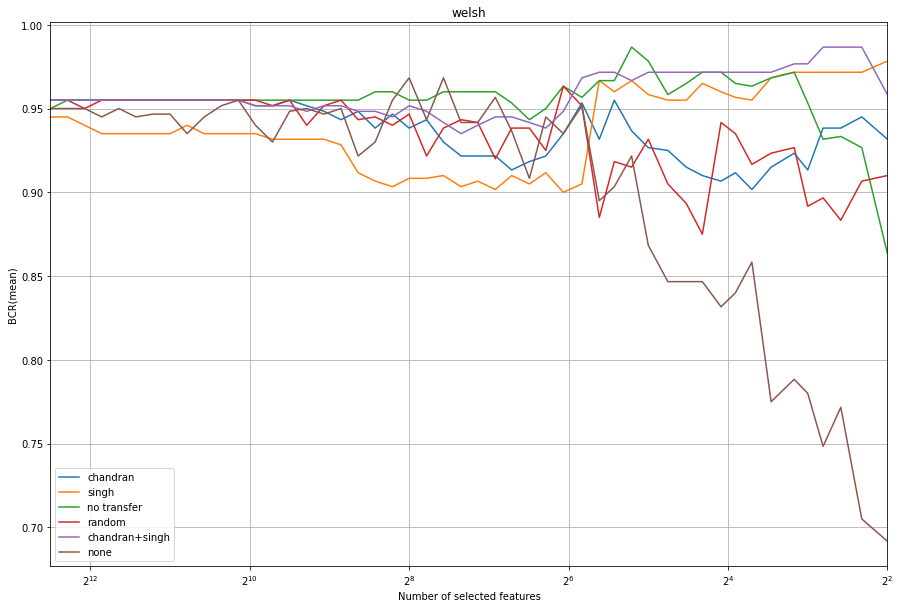

In [846]:
import matplotlib.pyplot as plt
%matplotlib inline

idx_target = 0
df_bcr_mean = pd.DataFrame(df_bcr.groupby(['target', 'source', 'num features'])['BCR'].mean()).reset_index()
for idx_target in FILTER_TARGETS:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_bcr_mean.loc[df_bcr_mean['target'] == target]
    plt.figure(figsize=(15,10))
    plt.xscale('log', basex=2)
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
        if idx_source!= idx_target:
            label = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == label]
            plt.xlim(max(df_source['num features']), min(df_source['num features']))
            plt.plot(df_source['num features'], df_source['BCR'], label=label)

    plt.title(target)
    plt.xlabel("Number of selected features")
    #plt.xlim(100,400)
    #plt.xticks(df_source['num features'])
    plt.ylabel("BCR(mean)")
    plt.legend(loc = "best")
    plt.grid()
    plt.show()

### Plot BCR (standard error)

Standard error is relatively high and could weaken in a high amount the conclusions ot this statistical experiment. It's necessary to increase the iteration number to see if we can reduce this metric.

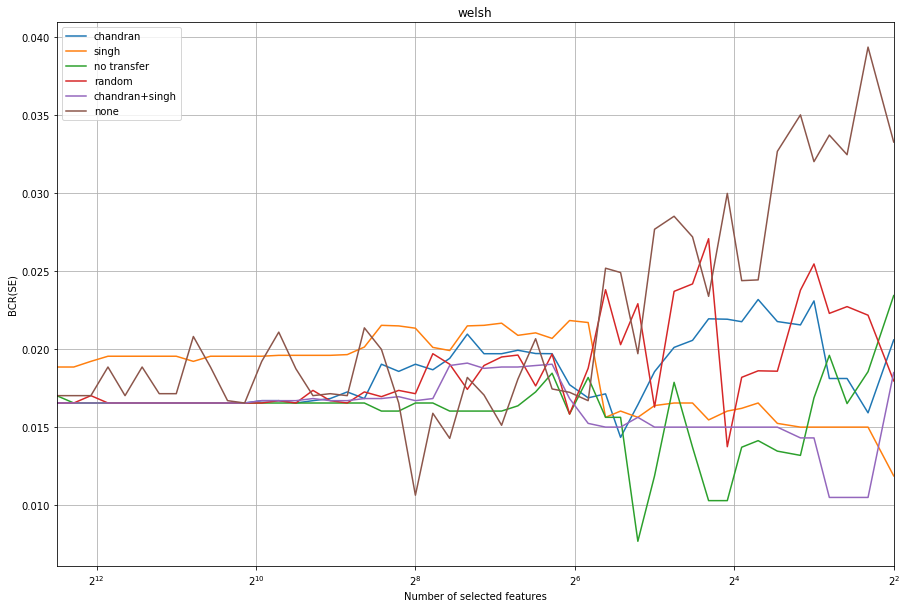

In [845]:
idx_target = 0
df_bcr_mean = pd.DataFrame(df_bcr.groupby(['target', 'source', 'num features'])['BCR'].sem()).reset_index()
for idx_target in FILTER_TARGETS:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_bcr_mean.loc[df_bcr_mean['target'] == target]
    plt.figure(figsize=(15,10))
    plt.xscale('log', basex=2)
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
        if idx_source!= idx_target:
            label = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == label]
            plt.xlim(max(df_source['num features']), min(df_source['num features']))
            plt.plot(df_source['num features'], df_source['BCR'], label=label)

    plt.title(target)
    plt.xlabel("Number of selected features")
    #plt.xlim(100,400)
    #plt.xticks(df_source['num features'])
    plt.ylabel("BCR(SE)")
    plt.legend(loc = "best")
    plt.grid()
    plt.show()

### Calculate stability

In [820]:
stability = []
for idx_target in FILTER_TARGETS:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_bcr.loc[df_bcr['target'] == target]
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        if idx_source!= idx_target:
            source = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == source]
            n_features = np.unique(df_source['num features'])
            #print(n_features)
            for num_features in n_features:
                df_num_features = df_source[df_source['num features'] == num_features]
                # Calculate stability
                s = num_features
                s2 = s**2
                n = 12598
                s2_n = s2/n
                den = s - s2_n
                list_S = list(df_num_features['S'])
                stab = 0
                count = 0
                k = len(list_S)
                for i in range(k):
                    for j in range(i+1, k):
                        Si_Sj = np.intersect1d(list_S[i], list_S[j])
                        stab += (len(Si_Sj) - s2_n) / den
                        count += 1
                stability.append([target, source, num_features, stab/count])
                #print(1/count, 2/(k*(k-1)), stability[-1], 2*stab/(k*(k-1)))
                
df_stab = pd.DataFrame(stability, columns=['target', 'source', 'num features', 'stability'])
df_stab.head()


,target,source,num features,stability
0,chandran,singh,4,0.378986
1,chandran,singh,5,0.443698
2,chandran,singh,6,0.514463
3,chandran,singh,7,0.569790
4,chandran,singh,8,0.601482


### Plot stability

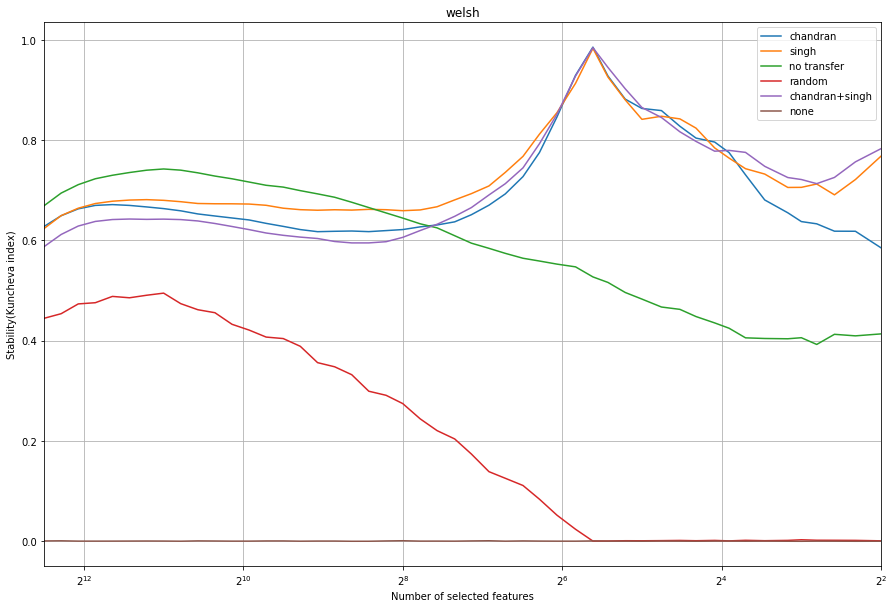

In [847]:
idx_target = 0
for idx_target in FILTER_TARGETS:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_stab.loc[df_stab['target'] == target]
    plt.figure(figsize=(15,10))
    plt.xscale('log', basex=2)
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
        if idx_source!= idx_target:
            label = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == label]
            plt.xlim(max(df_source['num features']), min(df_source['num features']))
            plt.plot(df_source['num features'], df_source['stability'], label=label)

    plt.title(target)
    plt.xlabel("Number of selected features")
    #plt.xlim(100,400)
    #plt.xticks(df_source['num features'])
    plt.ylabel("Stability(Kuncheva index)")
    plt.legend(loc = "best")
    plt.grid()
    plt.show()

### Impact of B

#### BCR

In [838]:
FILTER_TARGETS = [2] #welsh
features_to_select = np.unique(np.logspace(2, 12.5, num=50, endpoint=True, base=2.0, dtype=int))
bcr_list = []
B_values = [1,2,5,10,100,1000]
for g_B in B_values:
    for g_k in range(50):
        for idx_target in FILTER_TARGETS:
            #print("TARGET", SAMPLE_NAMES[idx_target])
            X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target =\
            get_target_data_sets(df_samples_norm, idx_target)
            for idx_source in [DUAL_TRANSFER_IDX + idx_target]:
                for features_selected in features_to_select:
                    #print("Features",features_selected)
                    bcr, ranking_selected = compute_transfer(X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target,\
                                           idx_source=idx_source, num_features_selected=features_selected)
                    bcr_list.append([g_B, features_selected, bcr, ranking_selected])
                    if VERBOSE: print("Target", idx_target, "Source", idx_source, "#Features",\
                                      features_selected, "BCR", bcr)

df_bcr_B = pd.DataFrame(bcr_list, columns=['B', 'num features', 'BCR', 'S'])
df_bcr_B.head()

,B,num features,BCR,S
0,1,4,1.0,"[9964, 9846, 7918, 9387]"
1,1,5,1.0,"[9964, 9846, 7918, 9387, 1006]"
2,1,6,1.0,"[9964, 9846, 7918, 9387, 1006, 6934]"
3,1,7,1.0,"[9964, 9846, 7918, 9387, 1006, 6934, 8683]"
4,1,8,1.0,"[9964, 9846, 7918, 9387, 1006, 6934, 8683, 9028]"


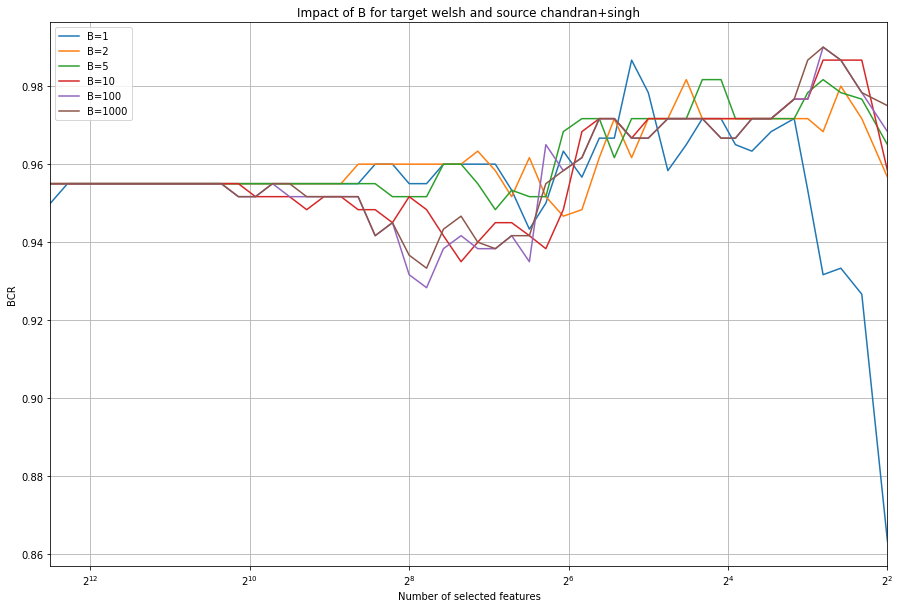

In [841]:
idx_target = 2
df_bcr_mean = pd.DataFrame(df_bcr_B.groupby(['B', 'num features'])['BCR'].mean()).reset_index()

target = SAMPLE_NAMES[2]
source = SAMPLE_NAMES[DUAL_TRANSFER_IDX + idx_target]
plt.figure(figsize=(15,10))
plt.xscale('log', basex=2)
for idx_B in B_values:
    df_B = df_bcr_mean.loc[df_bcr_mean['B'] == idx_B]
    plt.xlim(max(df_B['num features']), min(df_B['num features']))
    plt.plot(df_B['num features'], df_B['BCR'], label='B=' + str(idx_B))
plt.title("Impact of B for target " + target + " and source " + source)
plt.xlabel("Number of selected features")
#plt.xlim(100,400)
#plt.xticks(df_source['num features'])
plt.ylabel("BCR")
plt.legend(loc = "best")
plt.grid()
plt.show()

#### Stability

In [840]:
stability = []
for idx_B in B_values:
    df_B = df_bcr_B.loc[df_bcr_B['B'] == idx_B]
    n_features = np.unique(df_bcr['num features'])
    #print(n_features)
    for num_features in n_features:
        df_num_features = df_B[df_B['num features'] == num_features]
        # Calculate stability
        s = num_features
        s2 = s**2
        n = 12598
        s2_n = s2/n
        den = s - s2_n
        list_S = list(df_num_features['S'])
        stab = 0
        count = 0
        k = len(list_S)
        for i in range(k):
            for j in range(i+1, k):
                Si_Sj = np.intersect1d(list_S[i], list_S[j])
                stab += (len(Si_Sj) - s2_n) / den
                count += 1
        stability.append([idx_B, num_features, stab/count])
        #print(1/count, 2/(k*(k-1)), stability[-1], 2*stab/(k*(k-1)))
                
df_stab_B = pd.DataFrame(stability, columns=['B', 'num features', 'stability'])
df_stab_B.head()


,B,num features,stability
0,1,4,0.413487
1,1,5,0.409562
2,1,6,0.412645
3,1,7,0.392432
4,1,8,0.405847


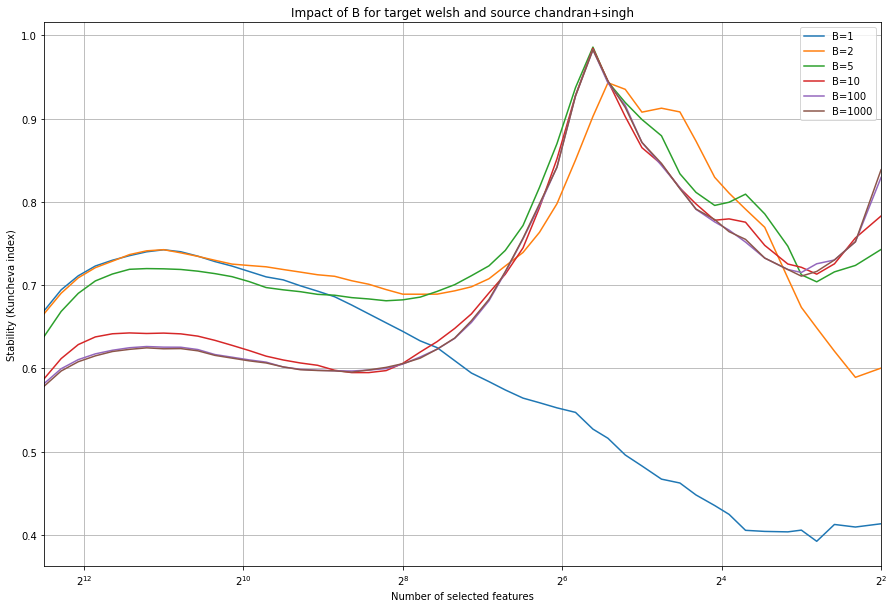

In [842]:
target = SAMPLE_NAMES[idx_target]
source = SAMPLE_NAMES[DUAL_TRANSFER_IDX + idx_target]
plt.figure(figsize=(15,10))
plt.xscale('log', basex=2)
for idx_B in B_values:
    df_B = df_stab_B.loc[df_stab_B['B'] == idx_B]
    plt.xlim(max(df_B['num features']), min(df_B['num features']))
    plt.plot(df_B['num features'], df_B['stability'], label='B=' + str(idx_B))
plt.title("Impact of B for target " + target + " and source " + source)
plt.xlabel("Number of selected features")
#plt.xlim(100,400)
#plt.xticks(df_source['num features'])
plt.ylabel("Stability (Kuncheva index)")
plt.legend(loc = "best")
plt.grid()
plt.show()

# Tools

## Backups

In [843]:
import pickle

binary_file = open('df_bcr.bin',mode='wb')
pickle.dump(df_bcr, binary_file)
binary_file.close()

binary_file = open('df_bcr_B.bin',mode='wb')
pickle.dump(df_bcr_B, binary_file)
binary_file.close()

binary_file = open('df_stab.bin',mode='wb')
pickle.dump(df_stab, binary_file)
binary_file.close()

binary_file = open('df_stab_B.bin',mode='wb')
pickle.dump(df_stab_B, binary_file)
binary_file.close()

## Restores

In [ ]:
binary_file = open('df_bcr.bin',mode='rb')
df_bcr = pickle.load(binary_file)
binary_file.close()

binary_file = open('df_bcr_B.bin',mode='rb')
df_bcr_B = pickle.load(binary_file)
binary_file.close()

binary_file = open('df_stab.bin',mode='rb')
df_stab = pickle.load(binary_file)
binary_file.close()

binary_file = open('df_stab_B.bin',mode='rb')
df_stab_B = pickle.load(binary_file)
binary_file.close()

# Outputs

In [ ]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx feature_selection_linear_models.ipynb
/Library/TeX/texbin/pdflatex -shell-escape feature_selection_linear_models
jupyter nbconvert --to html_with_toclenvs feature_selection_linear_models.ipynb 1> /dev/null